## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [2]:
#
# Your code to import matplotlib, pandas and numpy libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Following code loads the CIFAR 10 datset.

In [3]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
#
# Your code to print shapes of training and test data. Check how the data looks
#
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
# Your code to print the shape of one image.
x_train[0].shape

(32, 32, 3)

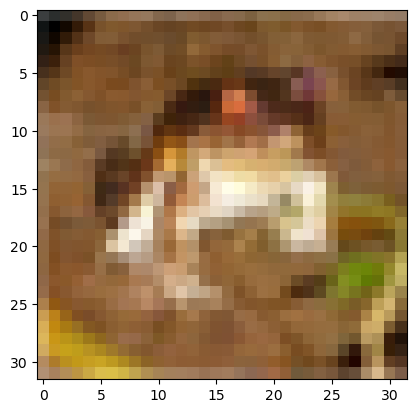

In [6]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
plt.imshow(x_train[0])

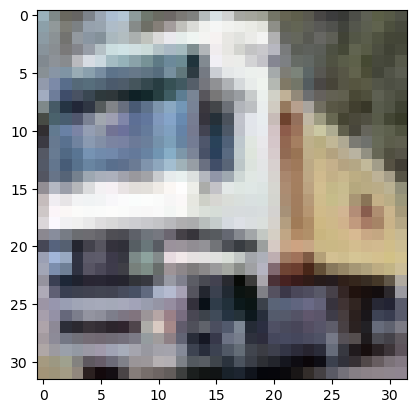

In [7]:
# Show any other image
plt.imshow(x_train[1])

# PreProcessing

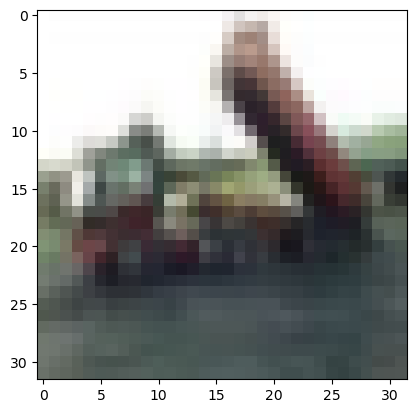

In [8]:
# Your code to print one image in digitals. Check how pixels look like. 
plt.imshow(x_train[2])

In [9]:
# Your code to print shape of any image i.e particular value in the x_train
x_train[2].shape

(32, 32, 3)

In [10]:
# Your code to print the maximum value in x_train. Hint - Use .max()
np.max(x_train)

255

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
# Print the shape of x_train again.
print(x_train.shape)

(50000, 32, 32, 3)


In [13]:
# Print the shape of y_train again.
print(y_train.shape)

(50000, 1)


# One hot vector encoding.
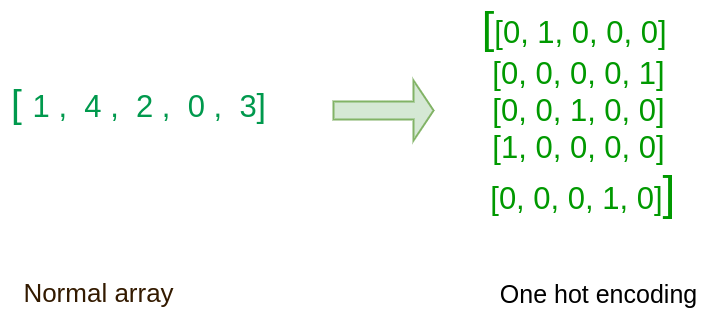


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [14]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]
print(y_train[0])
# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
y_cat_train = to_categorical(y_train,10)

[6]


In [15]:
# Your code to print shape of the array y_cat_train
y_cat_train.shape

(50000, 10)

In [16]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.
print(y_cat_train[0])

# Compare the result for better understanding of "to_categorical()"

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test,10)

# Print the shapes to look how y_cat_test looks.
print(y_cat_test.shape)
print(y_test[0])
print(y_cat_test[0])

(10000, 10)
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


----------
# Building the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [19]:
model = Sequential()

#conv layer
model.add(Conv2D(filters=56, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
#pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
#

#conv layer
model.add(Conv2D(filters=56, kernel_size=(4,4), activation='relu',))
#pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

#conv layer
model.add(Conv2D(filters=56, kernel_size=(4,4), activation='relu',))
#pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

#
# Add few dense layers. 
#

model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 56)        2744      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 56)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        50232     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 56)          50232     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 56)          0

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [22]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch
history = model.fit(x_train,y_cat_train, epochs = 17, validation_data=(x_test,y_cat_test), shuffle=True, verbose=1,
                    callbacks = [early_stop])

Epoch 1/17


1563/1563 [==============================] - 15s 9ms/step - loss: 1.6644 - accuracy: 0.3756 - val_loss: 1.4058 - val_accuracy: 0.4909
Epoch 2/17
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2894 - accuracy: 0.5349 - val_loss: 1.2087 - val_accuracy: 0.5655
Epoch 3/17
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1432 - accuracy: 0.5975 - val_loss: 1.1140 - val_accuracy: 0.6122
Epoch 4/17
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0455 - accuracy: 0.6351 - val_loss: 1.1735 - val_accuracy: 0.5960
Epoch 5/17
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9690 - accuracy: 0.6616 - val_loss: 1.0992 - val_accuracy: 0.6189
Epoch 6/17
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9092 - accuracy: 0.6835 - val_loss: 0.9963 - val_accuracy: 0.6541
Epoch 7/17
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8598 - accuracy: 0.7015 - val_loss: 0.9937 - val_

### We can save the model in a file. Following code shows how to do this.

In [24]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [25]:
losses = pd.DataFrame(model.history.history)

In [26]:
# Print first few rows of losses.
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.664441,0.37556,1.405830,0.4909
1,1.289410,0.53490,1.208691,0.5655
2,1.143161,0.59752,1.113964,0.6122
3,1.045522,0.63510,1.173526,0.5960
4,0.969011,0.66158,1.099234,0.6189


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





<Axes: >

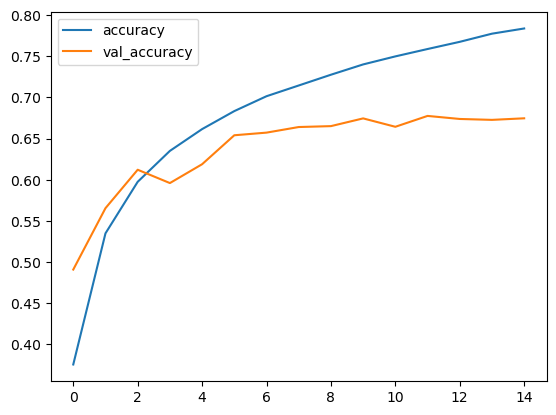

In [27]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
#
losses[['accuracy','val_accuracy']].plot()

<Axes: >

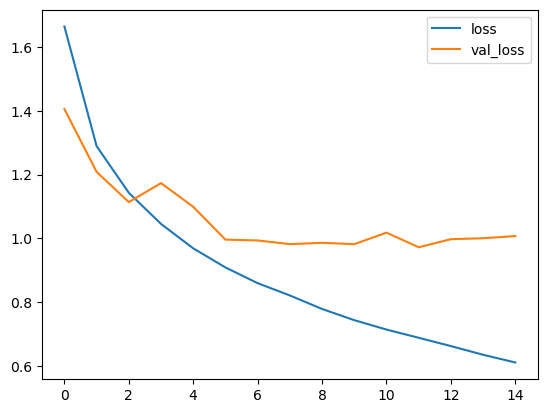

In [28]:
# 
# Your code to plot loss and val_loss vs the epochs
#
losses[['loss','val_loss']].plot()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [29]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [30]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0075160264968872, 0.6747000217437744]

### Make a prediction on test data set.   

In [31]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 1s 3ms/step


### We could get the full classification report. 

In [ ]:
# Your code to import classification_report library from sklearn.metrics


In [ ]:
classification_report(y_test, predictions)

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [ ]:
# Your code to import confusion_matrix library from sklearn.metrics


In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [ ]:
my_image = x_test[16]

In [ ]:
plt.imshow(my_image)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

array([5])

In [1]:
# Find the highest probability value in the vector above. 
# What output value does it point to?

In [ ]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [3]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 